# Covid-19 Analysis #

***
This notebook contains my analysis of the Covid-19 vaccination program.

# Overview of the COVID-19 Vaccination Datasets

## [Weekly vaccination dataset information](https://covid19ireland-geohive.hub.arcgis.com/datasets/0101ed10351e42968535bb002f94c8c6_0/about)

This dataset provides comprehensive details on COVID-19 vaccination efforts, capturing key metrics across temporal, demographic, and vaccination-specific categories. The data is structured as follows:

## **Temporal Details & Geographical Details**
- **Extract Date:** The date on which the dataset was extracted, enabling time-based tracking of updates.
- **Vaccination Date:** The specific dates vaccinations occurred, facilitating analysis of daily trends.
- **Week:** Epidemiological week classification for standardized reporting, referencing [HPSC Epidemiological Weeks](https://www.hpsc.ie/notifiablediseases/resources/epidemiologicalweeks/).
- **Latitude and Longitude:** Geographic coordinates associated with the vaccination data.

## **Vaccination Totals**
- **Total Daily Vaccines:** Total number of vaccines administered daily.

## **Demographics**
- **Gender:** Data on the number of vaccines administered, categorized as Male, Female, or Not Assigned (NA).
- **Age Group:** Vaccination data is broken into specific age cohorts for detailed demographic analysis:
  - Partial Vaccination (at least one dose) and Full Vaccination (complete dose series) metrics are provided for age cohorts spanning from 0–9 to 80+ years.
  - Data includes both daily and cumulative counts, as well as percentages representing vaccination coverage within each cohort.

## **Dose Information**
- **Dose 1, Dose 2, and Single Dose:** Counts for each type of vaccination administered based on the dose type.
- **Fully Vaccinated:** Includes data on individuals completing the vaccination regimen (e.g., Dose 2 for mRNA or AstraZeneca vaccines, or a single-dose Janssen vaccine).

## **Vaccine Brand**
- Details vaccinations administered by brand, including Moderna, Pfizer, Janssen, and AstraZeneca.

## **Age Group Cumulative Data**
- **Cumulative Counts:** Tracks cumulative totals for partial and fully vaccinated individuals in each age group over time.
- **Cumulative Percentages:** Proportions of partial and fully vaccinated individuals relative to the population of each age cohort.

---

## **Key Metrics Summary**
This dataset provides granular insights into vaccination progress, enabling the evaluation of:
- Daily and cumulative vaccination rates.
- Vaccination coverage across age groups and genders.
- The impact of different vaccine brands.
- Trends over time and geographical distribution using temporal and spatial fields.

This structure supports public health monitoring, epidemiological research, and vaccination campaign evaluation.

## [Weekly Booster Vaccination Dataset](https://covid-19.geohive.ie/datasets/edcdb71467244bae90190d54fd665c74_0/about)

This dataset provides detailed insights into the administration of COVID-19 booster vaccines, categorized by temporal, demographic, dose-specific, and vaccine-specific attributes. The data structure is outlined as follows:

## **Temporal and Geographical Details**
- **Extract Date:** The date on which the data was extracted for analysis.
- **Date:** Specific dates associated with booster administration records.
- **Week and EpiWeek:** Epidemiological week identifiers for standard reporting and temporal trend analysis.
- **Latitude and Longitude:** Geographic coordinates linked to the vaccination data.

## **Booster Vaccination Totals**
- **Weekly Booster Vaccines:** Total number of booster doses administered each week.

## **Demographics**
- **Gender:** Booster vaccine data categorized by gender:
  - **Female, Male, Not Assigned (NA):** Counts of administered boosters for each gender category.

- **Age Groups:** Booster doses administered across age cohorts:
  - **Additional Doses (Age 5–11 to 80+):** Weekly and cumulative data for additional doses.
  - **Immunocompromised Doses (Age 5–11 to 80+):** Weekly and cumulative data for doses administered to immunocompromised individuals.
  - **Additional Dose 2, 3, and 4 (Age 5–11 to 80+):** Weekly and cumulative data for subsequent booster doses (2nd, 3rd, and 4th) in these age cohorts.
  - **Percentages by Age Group:** Coverage rates (% of population) for each age cohort and booster dose.

## **Booster Brand**
- Details boosters administered by brand, including Moderna, Pfizer, Janssen, and AstraZeneca.

## **Cumulative and Percentage Metrics**
- **Cumulative Totals:** Tracks the total number of doses administered up to a given date.
- **Population Coverage:** Percentages representing the share of the population receiving booster doses, broken down by:
  - Dose type (e.g., additional doses, subsequent doses).
  - Age group (e.g., 5–11, 12–19, etc.).
  - Vaccine brand.

---

## **Key Metrics Summary**
This dataset enables in-depth analysis of:
- Weekly trends in booster administration.
- Demographic disparities in vaccine distribution by age and gender.
- Brand-specific booster uptake.
- Booster coverage rates across multiple dose types and age cohorts.
- Targeted analysis of immunocompromised populations and additional dose recipients.


In [31]:
# Load the weekly vaccinations dataset

import pandas as pd

df = pd.read_csv('covid_weekly_vaccine.csv') # https://covid19ireland-geohive.hub.arcgis.com/datasets/0101ed10351e42968535bb002f94c8c6_0/explore?location=53.510274%2C-7.920586%2C7.88

# Let's have a look at the data
df.head()

,X,Y,ExtractDate,Week,TotalweeklyVaccines,Male,Female,NA,Moderna,Pfizer,...,FullyPer_Age10to19,FullyPer_Age20to29,FullyPer_Age30to39,FullyPer_Age40to49,FullyPer_Age50to59,FullyPer_Age60to69,FullyPer_Age70to79,FullyPer_80_,FullyPer_NA,ObjectId
0,-856336.314876,7.036492e+06,2024/05/12 23:00:00+00,2020-W53,4076,1304,2772,0,10,4052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,-856336.314876,7.036492e+06,2024/05/12 23:00:00+00,2021-W01,44220,11846,32374,0,28,44148,...,0.000004,0.000018,0.000042,0.000011,0.000011,0.000010,0.000009,0.000049,NaN,2
2,-856336.314876,7.036492e+06,2024/05/12 23:00:00+00,2021-W02,53145,14057,39088,0,1946,51118,...,0.000004,0.000032,0.000079,0.000023,0.000020,0.000018,0.000014,0.000060,NaN,3
3,-856336.314876,7.036492e+06,2024/05/12 23:00:00+00,2021-W03,50222,14964,35258,0,51,50000,...,0.000004,0.000669,0.001511,0.001108,0.001237,0.000756,0.000086,0.000125,NaN,4
4,-856336.314876,7.036492e+06,2024/05/12 23:00:00+00,2021-W04,51949,15066,36883,0,35,51652,...,0.000007,0.007608,0.015900,0.015613,0.017585,0.011731,0.001500,0.004408,inf,5


In [32]:
# Check for missing data in the dataframe
missing_data = df.isnull().sum()

# Drop rows with missing data
df_cleaned = df.fillna(0)

# Print the count of missing data per column
print("Missing data per column:")
print(missing_data)

# Display the cleaned dataframe (first few rows)
print("\nCleaned DataFrame:")
print(df_cleaned.head())

Missing data per column:
X                      0
Y                      0
ExtractDate            0
Week                   0
TotalweeklyVaccines    0
                      ..
FullyPer_Age60to69     1
FullyPer_Age70to79     1
FullyPer_80_           1
FullyPer_NA            4
ObjectId               0
Length: 73, dtype: int64

Cleaned DataFrame:
               X             Y             ExtractDate      Week  \
0 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2020-W53   
1 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2021-W01   
2 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2021-W02   
3 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2021-W03   
4 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2021-W04   

   TotalweeklyVaccines   Male  Female  NA  Moderna  Pfizer  ...  \
0                 4076   1304    2772   0       10    4052  ...   
1                44220  11846   32374   0       28   44148  ...   
2                53145  14057   39088   0    

In [33]:
# Convert the 'week' column to a proper date (first day of the ISO week)
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Week'] + '-1', format='%G-W%V-%u')

# Check the first few rows
df_cleaned[['Week', 'Date']].head()

,Week,Date
0,2020-W53,2020-12-28
1,2021-W01,2021-01-04
2,2021-W02,2021-01-11
3,2021-W03,2021-01-18
4,2021-W04,2021-01-25


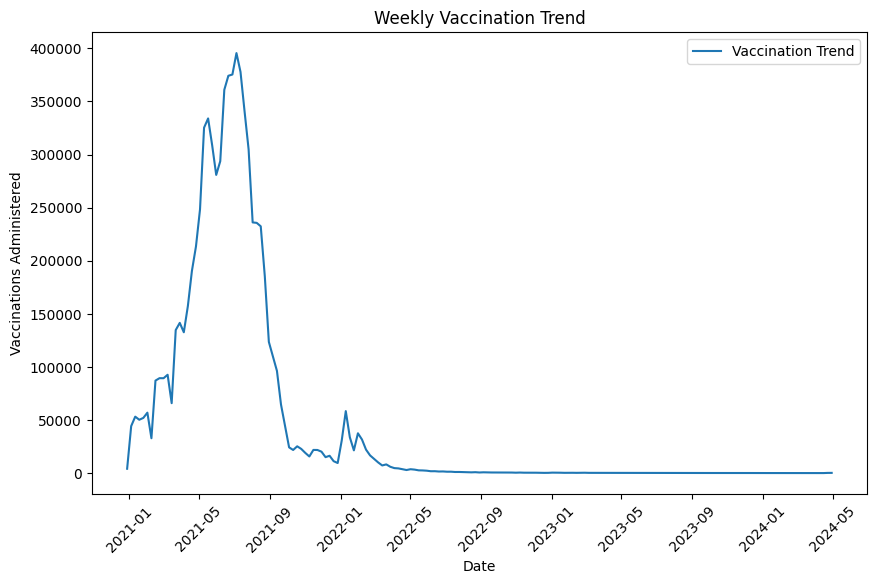

In [34]:
import matplotlib.pyplot as plt

# Assuming the vaccination count column is named 'Vaccination_Count' (replace if necessary)
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned['Date'], df_cleaned['TotalweeklyVaccines'], label='Vaccination Trend')
plt.xlabel('Date')
plt.ylabel('Vaccinations Administered')
plt.title('Weekly Vaccination Trend')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [35]:
import pandas as pd

# Convert the ISO week to the first day of that week (Monday)
end_date = pd.to_datetime('2022-W26-1', format='%G-W%V-%u')  # The first day of '2022-W26'

print(end_date)

2022-06-27 00:00:00


NameError: name 'mdates' is not defined

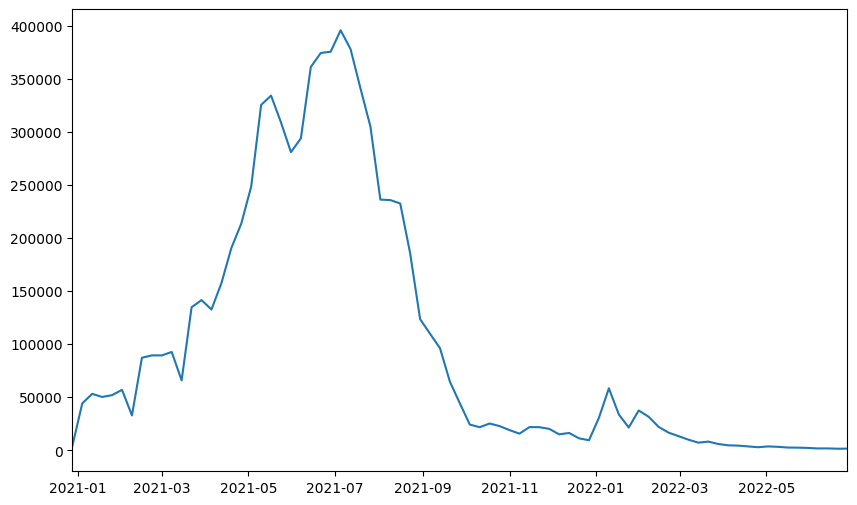

In [36]:
import matplotlib.pyplot as plt

# Plot vaccination trend
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned['Date'], df_cleaned['TotalweeklyVaccines'], label='Vaccination Trend')

# Set x-axis limits (start from the first date in the data to '2022-W26')
plt.xlim(df_cleaned['Date'].min(), end_date)

# Format x-axis date labels and rotate them
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Vaccinations Administered')
plt.title('Weekly Vaccination Trend')

# Display legend
plt.legend()

# Show plot
plt.show()

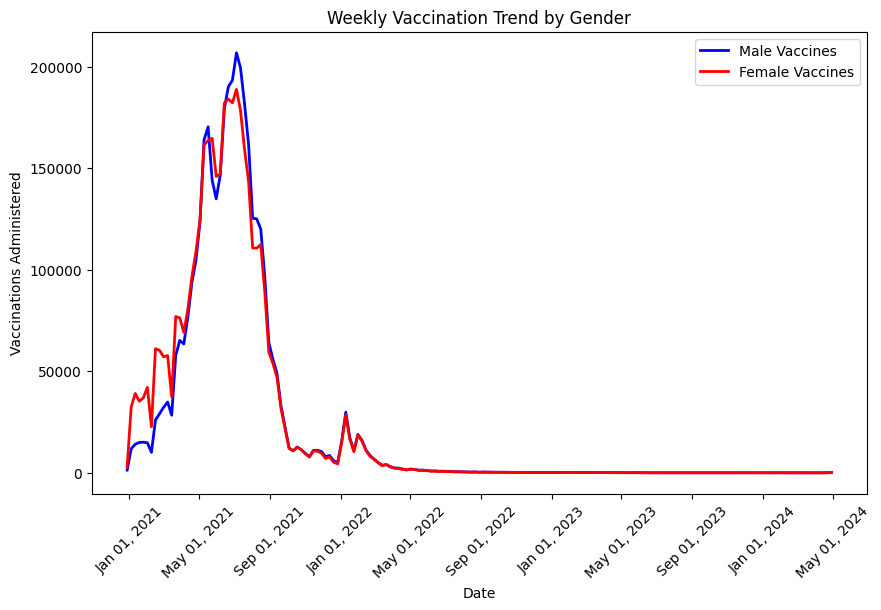

In [527]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Make sure you have the correct column names for male and female vaccine counts
# Example column names: 'Male_Vaccines' and 'Female_Vaccines'

plt.figure(figsize=(10, 6))

# Plot male vaccination trend
plt.plot(df_cleaned['Date'], df_cleaned['Male'], label='Male Vaccines', color='blue', linestyle='-', linewidth=2)

# Plot female vaccination trend
plt.plot(df_cleaned['Date'], df_cleaned['Female'], label='Female Vaccines', color='red', linestyle='-', linewidth=2)

# Format x-axis to show dates better
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Vaccinations Administered')
plt.title('Weekly Vaccination Trend by Gender')

# Show legend
plt.legend()

# Display the plot
plt.show()

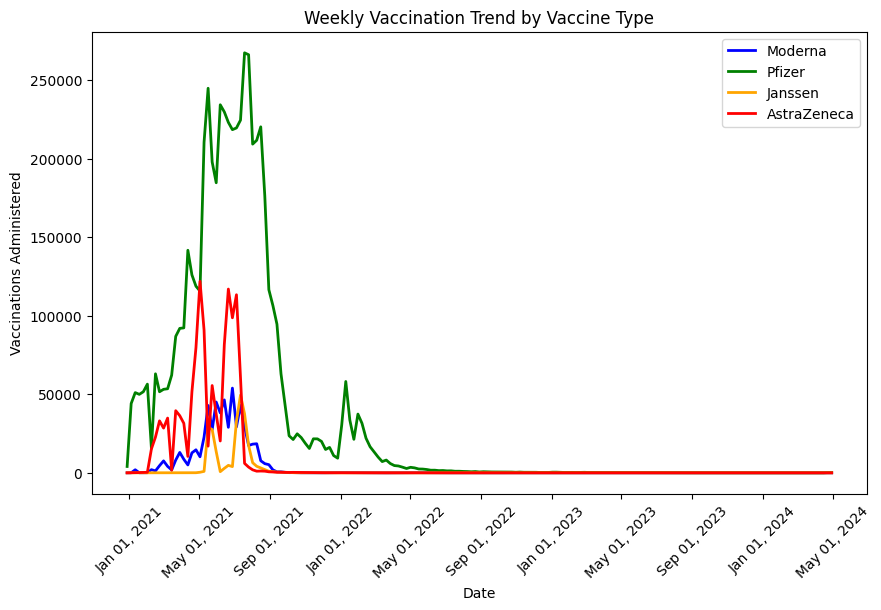

In [528]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting the vaccination trend for different vaccine types
plt.figure(figsize=(10, 6))

# Plot Moderna vaccinations
plt.plot(df_cleaned['Date'], df_cleaned['Moderna'], label='Moderna', color='blue', linestyle='-', linewidth=2)

# Plot Pfizer vaccinations
plt.plot(df_cleaned['Date'], df_cleaned['Pfizer'], label='Pfizer', color='green', linestyle='-', linewidth=2)

# Plot Janssen vaccinations
plt.plot(df_cleaned['Date'], df_cleaned['Janssen'], label='Janssen', color='orange', linestyle='-', linewidth=2)

# Plot AstraZeneca vaccinations
plt.plot(df_cleaned['Date'], df_cleaned['AstraZeneca'], label='AstraZeneca', color='red', linestyle='-', linewidth=2)

# Format x-axis to show dates better
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Vaccinations Administered')
plt.title('Weekly Vaccination Trend by Vaccine Type')

# Show legend
plt.legend()

# Display the plot
plt.show()

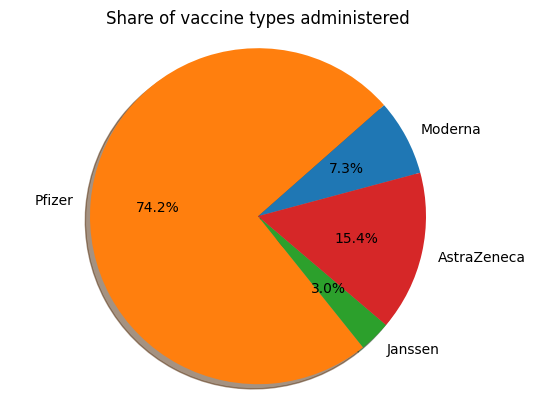

In [529]:
vaccine_type = [
    'Moderna', 'Pfizer', 'Janssen',
    'AstraZeneca'
]

total_vaccine_type = df_cleaned[vaccine_type].sum()

plt.pie(total_vaccine_type, labels= total_vaccine_type.index, autopct='%1.1f%%', startangle=15, shadow = True,)
plt.title('Share of vaccine types administered')
plt.axis('equal')
plt.show()


Partial_Age0to9       79207.0
Partial_Age10to19    362340.0
Partial_Age20to29    558006.0
Partial_Age30to39    596225.0
Partial_Age40to49    710341.0
Partial_Age50to59    636535.0
Partial_Age60to69    522056.0
Partial_Age70to79    395630.0
Partial_Age80_       251295.0
dtype: float64


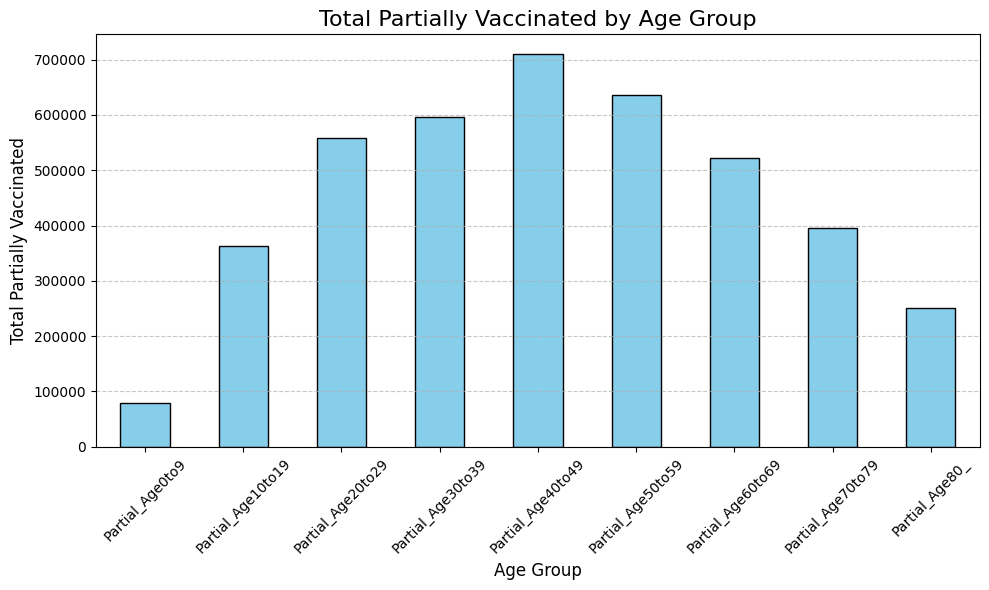

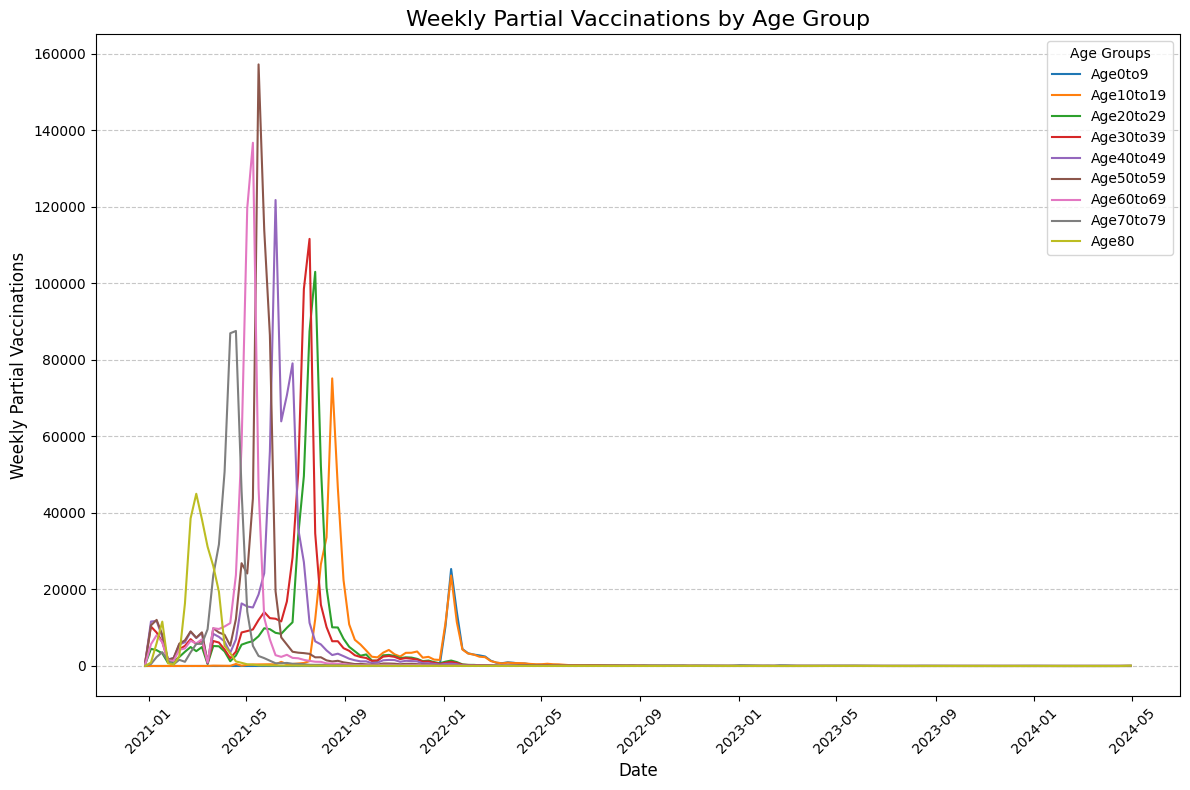

In [530]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define the partial vaccination columns
partial_vaccinated_columns = [
    'Partial_Age0to9', 'Partial_Age10to19', 'Partial_Age20to29',
    'Partial_Age30to39', 'Partial_Age40to49', 'Partial_Age50to59',
    'Partial_Age60to69', 'Partial_Age70to79', 'Partial_Age80_'
]

# 1. Total partial vaccinations by age group
total_partial_vaccinated_by_age = df_cleaned[partial_vaccinated_columns].sum()

print(total_partial_vaccinated_by_age)

# Plot total partial vaccinations by age group (Bar Chart)
plt.figure(figsize=(10, 6))
total_partial_vaccinated_by_age.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Partially Vaccinated by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Partially Vaccinated', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Trends over time for partial vaccinations by age group (Line Chart)
plt.figure(figsize=(12, 8))
for column in partial_vaccinated_columns:  # <- Add missing colon here
    plt.plot(df_cleaned['Date'], df_cleaned[column], label=column.split('_')[1])

plt.title('Weekly Partial Vaccinations by Age Group', fontsize=16)  # Corrected title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Partial Vaccinations', fontsize=12)  # Corrected ylabel
plt.legend(title="Age Groups")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Fully_Age0to9       73458.0
Fully_Age10to19    353212.0
Fully_Age20to29    549699.0
Fully_Age30to39    589031.0
Fully_Age40to49    704571.0
Fully_Age50to59    633728.0
Fully_Age60to69    519551.0
Fully_Age70to79    393663.0
Fully_Age80_       248658.0
dtype: float64


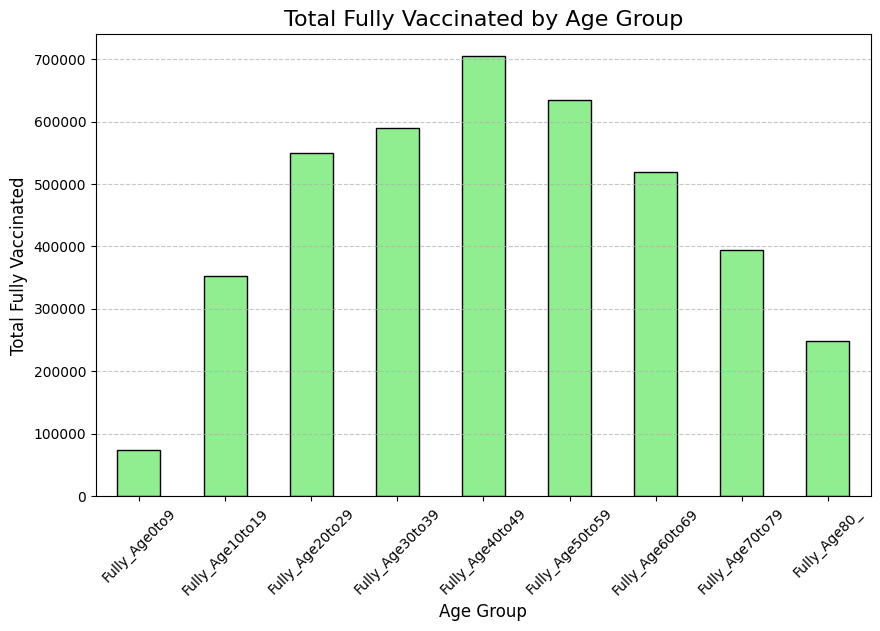

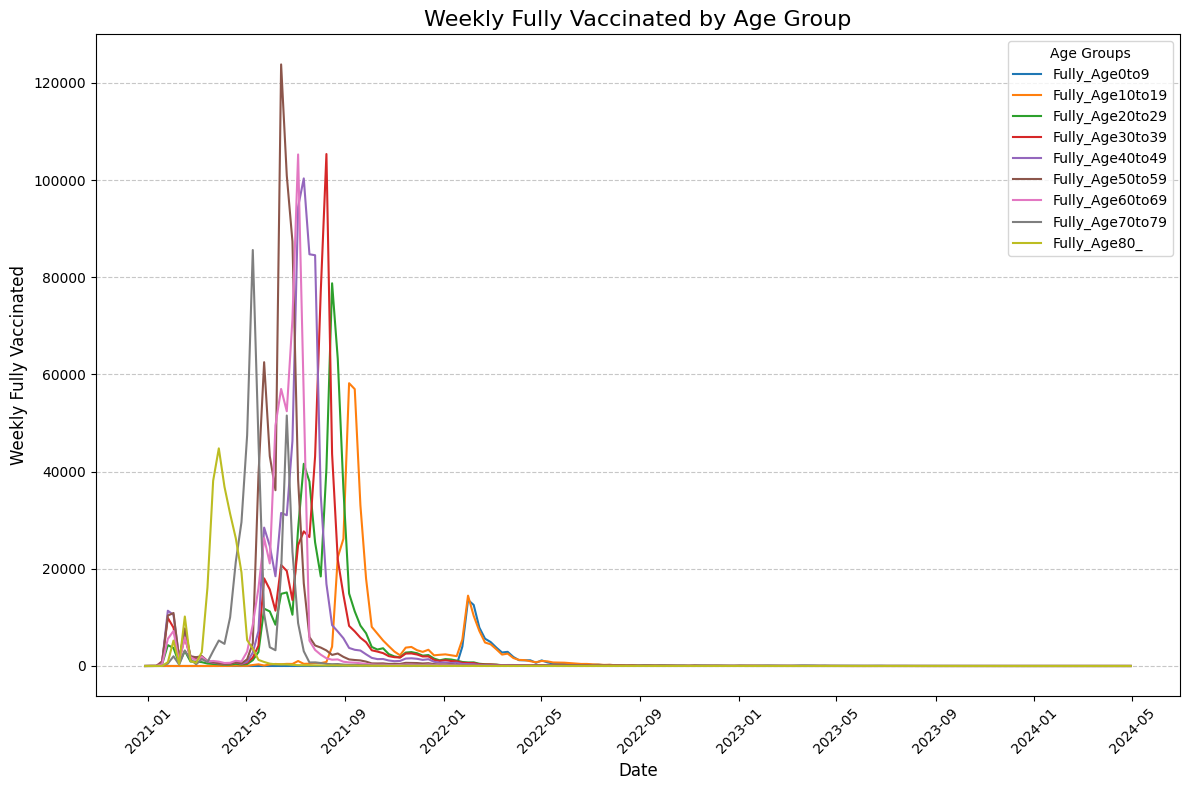

In [531]:
import matplotlib.pyplot as plt

# Extract columns related to fully vaccinated age groups
fully_vaccinated_columns = [
    'Fully_Age0to9', 'Fully_Age10to19', 'Fully_Age20to29',
    'Fully_Age30to39', 'Fully_Age40to49', 'Fully_Age50to59',
    'Fully_Age60to69', 'Fully_Age70to79', 'Fully_Age80_'
]

# 1. Total fully vaccinated by age group
total_fully_vaccinated_by_age = df_cleaned[fully_vaccinated_columns].sum()

print(total_fully_vaccinated_by_age)

# Plot total fully vaccinated by age group
plt.figure(figsize=(10, 6))
total_fully_vaccinated_by_age.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Total Fully Vaccinated by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Fully Vaccinated', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Trends over time for fully vaccinated age groups
plt.figure(figsize=(12, 8))
for column in fully_vaccinated_columns:
    plt.plot(df_cleaned['Date'], df_cleaned[column], label=column)

plt.title('Weekly Fully Vaccinated by Age Group', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Fully Vaccinated', fontsize=12)
plt.legend(title="Age Groups")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

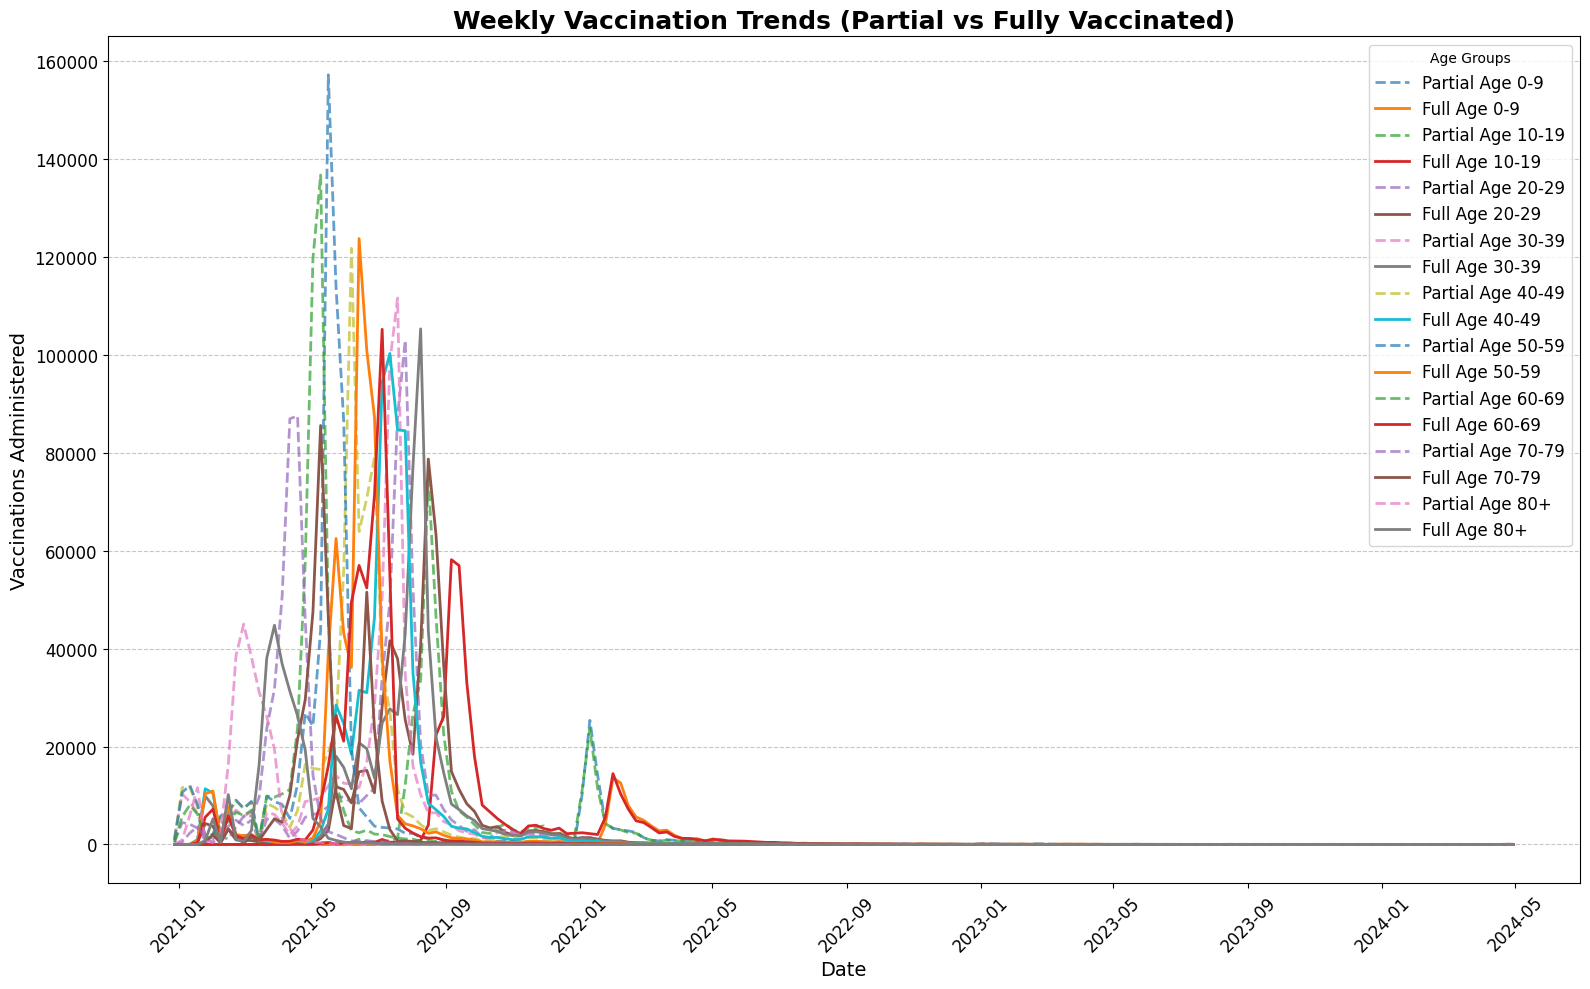

In [532]:
import matplotlib.pyplot as plt

# Define columns for partial and full vaccinations
partial_vaccinated_columns = [
    'Partial_Age0to9', 'Partial_Age10to19', 'Partial_Age20to29',
    'Partial_Age30to39', 'Partial_Age40to49', 'Partial_Age50to59',
    'Partial_Age60to69', 'Partial_Age70to79', 'Partial_Age80_'
]

fully_vaccinated_columns = [
    'Fully_Age0to9', 'Fully_Age10to19', 'Fully_Age20to29',
    'Fully_Age30to39', 'Fully_Age40to49', 'Fully_Age50to59',
    'Fully_Age60to69', 'Fully_Age70to79', 'Fully_Age80_'
]

# Plot for each column manually for all age groups
plt.figure(figsize=(16, 10))  # Increase figure size for better clarity

# Set line styles and make the lines thicker for better visibility
line_style_partial = {'linestyle': '--', 'alpha': 0.7, 'linewidth': 2}
line_style_full = {'linewidth': 2}

plt.plot(df_cleaned['Date'], df_cleaned[partial_vaccinated_columns[0]], label="Partial Age 0-9", **line_style_partial)
plt.plot(df_cleaned['Date'], df_cleaned[fully_vaccinated_columns[0]], label="Full Age 0-9", **line_style_full)

plt.plot(df_cleaned['Date'], df_cleaned[partial_vaccinated_columns[1]], label="Partial Age 10-19", **line_style_partial)
plt.plot(df_cleaned['Date'], df_cleaned[fully_vaccinated_columns[1]], label="Full Age 10-19", **line_style_full)

plt.plot(df_cleaned['Date'], df_cleaned[partial_vaccinated_columns[2]], label="Partial Age 20-29", **line_style_partial)
plt.plot(df_cleaned['Date'], df_cleaned[fully_vaccinated_columns[2]], label="Full Age 20-29", **line_style_full)

plt.plot(df_cleaned['Date'], df_cleaned[partial_vaccinated_columns[3]], label="Partial Age 30-39", **line_style_partial)
plt.plot(df_cleaned['Date'], df_cleaned[fully_vaccinated_columns[3]], label="Full Age 30-39", **line_style_full)

plt.plot(df_cleaned['Date'], df_cleaned[partial_vaccinated_columns[4]], label="Partial Age 40-49", **line_style_partial)
plt.plot(df_cleaned['Date'], df_cleaned[fully_vaccinated_columns[4]], label="Full Age 40-49", **line_style_full)

plt.plot(df_cleaned['Date'], df_cleaned[partial_vaccinated_columns[5]], label="Partial Age 50-59", **line_style_partial)
plt.plot(df_cleaned['Date'], df_cleaned[fully_vaccinated_columns[5]], label="Full Age 50-59", **line_style_full)

plt.plot(df_cleaned['Date'], df_cleaned[partial_vaccinated_columns[6]], label="Partial Age 60-69", **line_style_partial)
plt.plot(df_cleaned['Date'], df_cleaned[fully_vaccinated_columns[6]], label="Full Age 60-69", **line_style_full)

plt.plot(df_cleaned['Date'], df_cleaned[partial_vaccinated_columns[7]], label="Partial Age 70-79", **line_style_partial)
plt.plot(df_cleaned['Date'], df_cleaned[fully_vaccinated_columns[7]], label="Full Age 70-79", **line_style_full)

plt.plot(df_cleaned['Date'], df_cleaned[partial_vaccinated_columns[8]], label="Partial Age 80+", **line_style_partial)
plt.plot(df_cleaned['Date'], df_cleaned[fully_vaccinated_columns[8]], label="Full Age 80+", **line_style_full)

# Customize the plot appearance
plt.title("Weekly Vaccination Trends (Partial vs Fully Vaccinated)", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Vaccinations Administered", fontsize=14)
plt.legend(title="Age Groups", fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

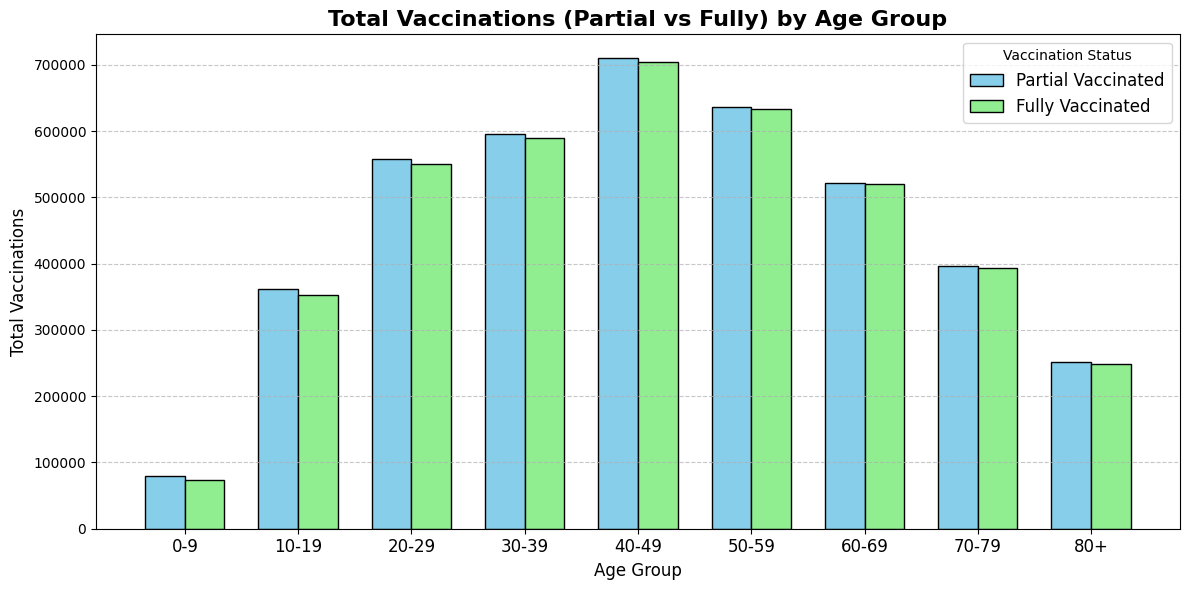

In [533]:
import matplotlib.pyplot as plt
import numpy as np


age_groups = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']  


total_partial_vaccinated_by_age = [79207.0, 362340.0, 558006.0, 596225.0, 710341.0, 636535.0, 522056.0, 395630.0, 251295.0]
total_fully_vaccinated_by_age = [73458.0, 353212.0, 549699.0, 589031.0, 704571.0, 633728.0, 519551.0, 393663.0, 248658.0]

# Create the positions for each bar
bar_width = 0.35
index = np.arange(len(age_groups))

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the partial vaccination bars (shifted to the left by half the bar width)
plt.bar(index - bar_width / 2, total_partial_vaccinated_by_age, bar_width, label='Partial Vaccinated', color='skyblue', edgecolor='black')

# Plot the fully vaccinated bars (shifted to the right by half the bar width)
plt.bar(index + bar_width / 2, total_fully_vaccinated_by_age, bar_width, label='Fully Vaccinated', color='lightgreen', edgecolor='black')

# Add title and labels
plt.title('Total Vaccinations (Partial vs Fully) by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Vaccinations', fontsize=12)
plt.xticks(index, age_groups, fontsize=12)
plt.legend(title="Vaccination Status", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

<class 'geopandas.geodataframe.GeoDataFrame'>


c:\Users\jaked\anaconda3\Lib\site-packages\cartopy\mpl\geoaxes.py:856: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  self.set_xlim([x1, x2])
c:\Users\jaked\anaconda3\Lib\site-packages\cartopy\mpl\geoaxes.py:857: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  self.set_ylim([y1, y2])


<GeoAxes: >

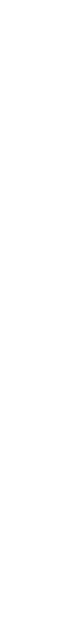

In [534]:
import geopandas as gpd # https://python-graph-gallery.com/map-read-geojson-with-python-geopandas/#:~:text=This%20post%20explains%20how%20to,Geoplot%20as%20shown%20below%20%F0%9F%94%A5!

geodata = gpd.read_file('weekly_vaccination_figures.geojson')

print(type(geodata))

import geoplot
import geoplot.crs as gcrs

geoplot.polyplot(
    geodata,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='darkgrey',
    facecolor='lightgrey',
    linewidth=.3,
    figsize=(12, 8)
)

In [535]:
print(geodata.head())  # Check the first few rows of your data

                ExtractDate      Week  TotalweeklyVaccines   Male  Female  NA  \
0 2024-05-12 23:00:00+00:00  2020-W53                 4076   1304    2772   0   
1 2024-05-12 23:00:00+00:00  2021-W01                44220  11846   32374   0   
2 2024-05-12 23:00:00+00:00  2021-W02                53145  14057   39088   0   
3 2024-05-12 23:00:00+00:00  2021-W03                50222  14964   35258   0   
4 2024-05-12 23:00:00+00:00  2021-W04                51949  15066   36883   0   

   Moderna  Pfizer  Janssen  AstraZeneca  ...  FullyPer_Age20to29  \
0       10    4052        0           12  ...                 NaN   
1       28   44148        1           43  ...            0.000018   
2     1946   51118        1           80  ...            0.000032   
3       51   50000        1          169  ...            0.000669   
4       35   51652        1          261  ...            0.007608   

   FullyPer_Age30to39  FullyPer_Age40to49  FullyPer_Age50to59  \
0                 NaN            

In [536]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('covid_weekly_vaccine.csv')

# Convert 'Date' (or 'Week') to datetime and encode it numerically
df['Date'] = pd.to_datetime(df['Week'] + '-1', format='%G-W%V-%u')
df['Week_Number'] = (df['Date'] - df['Date'].min()).dt.days // 7

# Drop the original 'Date' column
df = df.drop(columns=['Date'])

# Define target and features
target = 'TotalweeklyVaccines'
features = [
    'Male', 'Female', 'Moderna', 'Pfizer', 'Janssen', 'AstraZeneca',
    'Partial_Age0to9', 'Partial_Age10to19', 'Partial_Age20to29',
    'Partial_Age30to39', 'Partial_Age40to49', 'Partial_Age50to59',
    'Partial_Age60to69', 'Partial_Age70to79', 'Partial_Age80_',
    'Fully_Age0to9', 'Fully_Age10to19', 'Fully_Age20to29',
    'Fully_Age30to39', 'Fully_Age40to49', 'Fully_Age50to59',
    'Fully_Age60to69', 'Fully_Age70to79', 'Fully_Age80_', 
    'Week_Number'  # Use Week_Number instead of Date
]

# Drop rows with any NaN values in features
df = df.dropna(subset=features)

# Split features and target
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 1.1157447354361796
Mean Squared Error: 5.5413352410533125
R^2 Score: 0.9999999995152041


In [552]:
import pandas as pd

# Load the data
df = pd.read_csv('covid_weekly_vaccine.csv')
df2 = pd.read_csv('covid_weekly_booster.csv')

# Merge datasets on the 'Week' column using a left join
merged_df = pd.merge(df, df2, on='Week', how='left')

# Display the combined DataFrame
print(merged_df)

merged_df.to_csv('merged_covid_data.csv', index=False)

               X_x           Y_x           ExtractDate_x      Week  \
0   -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2020-W53   
1   -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2021-W01   
2   -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2021-W02   
3   -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2021-W03   
4   -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2021-W04   
..             ...           ...                     ...       ...   
170 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2024-W14   
171 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2024-W15   
172 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2024-W16   
173 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2024-W17   
174 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2024-W18   

     TotalweeklyVaccines  Male_x  Female_x  NA_x  Moderna_x  Pfizer_x  ...  \
0                   4076    1304      2772     0         10      4052  ...   
1  

In [554]:
df3 = pd.read_csv('merged_covid_data.csv')

print(df3)


               X_x           Y_x           ExtractDate_x      Week  \
0   -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2020-W53   
1   -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2021-W01   
2   -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2021-W02   
3   -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2021-W03   
4   -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2021-W04   
..             ...           ...                     ...       ...   
170 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2024-W14   
171 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2024-W15   
172 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2024-W16   
173 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2024-W17   
174 -856336.314876  7.036492e+06  2024/05/12 23:00:00+00  2024-W18   

     TotalweeklyVaccines  Male_x  Female_x  NA_x  Moderna_x  Pfizer_x  ...  \
0                   4076    1304      2772     0         10      4052  ...   
1  

In [557]:
# Convert the 'week' column to a proper date (first day of the ISO week)
df3['Date'] = pd.to_datetime(df3['Week'] + '-1', format='%G-W%V-%u')

# Check the first few rows
df3[['Week', 'Date']].head()

,Week,Date
0,2020-W53,2020-12-28
1,2021-W01,2021-01-04
2,2021-W02,2021-01-11
3,2021-W03,2021-01-18
4,2021-W04,2021-01-25


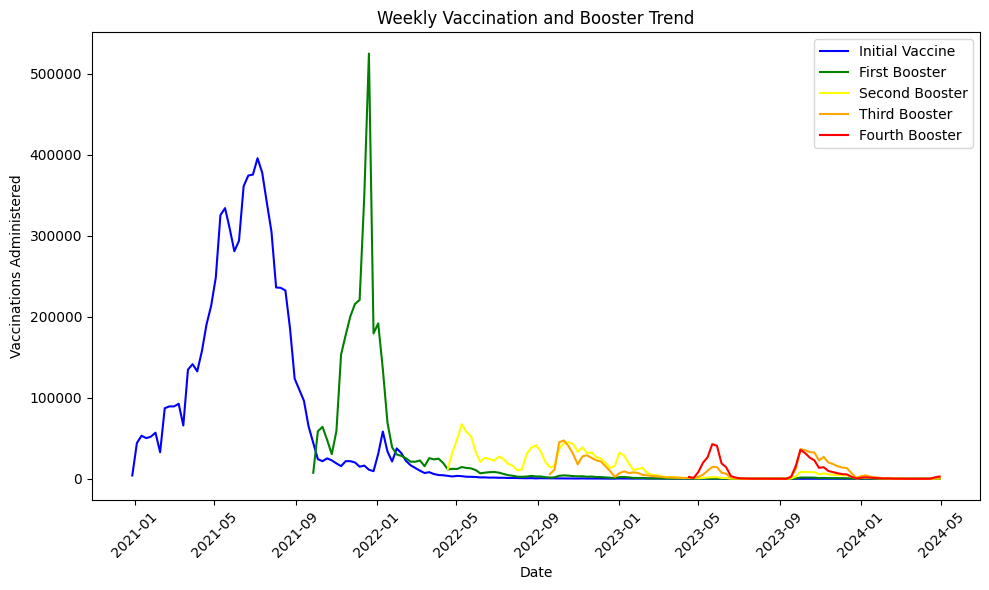

In [565]:
import matplotlib.pyplot as plt

# Create a plot with both vaccination and booster data
plt.figure(figsize=(10, 6))

# Plot Total Vaccines
plt.plot(df3['Date'], df3['TotalweeklyVaccines'], label='Initial Vaccine', color='blue')

# Plot Booster Vaccines
plt.plot(df3['Date'], df3['WeeklyBoosterVaccines'], label='First Booster', color='green')

plt.plot(df3['Date'], df3['WeeklyAdditionalDose2'], label='Second Booster', color='yellow')

plt.plot(df3['Date'], df3['WeeklyAdditionalDose3'], label='Third Booster', color='orange')

plt.plot(df3['Date'], df3['WeeklyAdditionalDose4'], label='Fourth Booster', color='red')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Vaccinations Administered')
plt.title('Weekly Vaccination and Booster Trend')

# Formatting the x-axis for better visibility
plt.xticks(rotation=45)

# Adding a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()